In [102]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction import DictVectorizer
from sklearn.linear_model import LogisticRegression


In [103]:
df = pd.read_csv(r"C:\Users\TALIGENT\Downloads\data-week-3.csv.csv")
df.columns = df.columns.str.lower().str.replace(' ', '_')

categorical_columns = list(df.dtypes[df.dtypes == 'object'].index)

for c in categorical_columns:
    df[c] = df[c].str.lower().str.replace(' ', '_')

df.totalcharges = pd.to_numeric(df.totalcharges, errors='coerce')
df.totalcharges = df.totalcharges.fillna(0)

df.churn = (df.churn == 'yes').astype(int)

In [104]:

df_full_train, df_test = train_test_split(df, test_size=0.2, random_state=1)
df_train, df_val = train_test_split(df_full_train, test_size=0.25, random_state=1)

df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

y_train = df_train.churn.values
y_val = df_val.churn.values
y_test = df_test.churn.values

del df_train['churn']
del df_val['churn']
del df_test['churn']
numerical = ['tenure', 'monthlycharges', 'totalcharges']

categorical = [
    'gender',
    'seniorcitizen',
    'partner',
    'dependents',
    'phoneservice',
    'multiplelines',
    'internetservice',
    'onlinesecurity',
    'onlinebackup',
    'deviceprotection',
    'techsupport',
    'streamingtv',
    'streamingmovies',
    'contract',
    'paperlessbilling',
    'paymentmethod',
]


In [105]:
dv = DictVectorizer(sparse=False)

train_dict = df_train[categorical + numerical].to_dict(orient='records')
X_train = dv.fit_transform(train_dict)

model = LogisticRegression()
model.fit(X_train, y_train)
val_dict = df_val[categorical + numerical].to_dict(orient='records')
X_val = dv.transform(val_dict)

y_pred = model.predict_proba(X_val)[:, 1]
churn_decision = (y_pred >= 0.5)
(y_val == churn_decision).mean()

c:\Users\TALIGENT\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\linear_model\_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 100 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=100).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


np.float64(0.8026969481902059)

In [106]:
###ACCURACY

q_pred_total = len(y_pred)
q_pred_correctas = (y_val == churn_decision).sum()
q_pred_incorrectas = q_pred_total - q_pred_correctas

q_pred_correctas / q_pred_total

np.float64(0.8026969481902059)

0.00 0.274
0.05 0.509
0.10 0.591
0.15 0.666
0.20 0.710
0.25 0.739
0.30 0.760
0.35 0.772
0.40 0.785
0.45 0.793
0.50 0.803
0.55 0.801
0.60 0.795
0.65 0.786
0.70 0.766
0.75 0.744
0.80 0.735
0.85 0.726
0.90 0.726
0.95 0.726
1.00 0.726


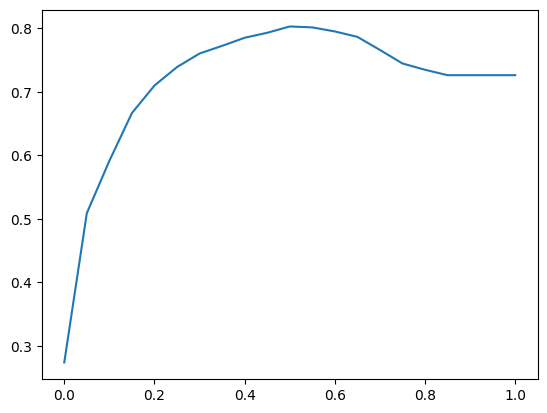

In [107]:
from sklearn.metrics import accuracy_score

#Limite (vemos el mejor corte para decirdir si abandona o no en la prediccion)
thresholds = np.linspace(0, 1 , 21)

scores = []
for t in thresholds:
    churn_decision = (y_pred >= t)
    score = accuracy_score(y_val, churn_decision)
    print('%.2f %.3f' %(t,score))
    scores.append(score)

plt.plot(thresholds,scores)

In [108]:
from collections import Counter

Counter(y_pred)

Counter(y_val)

1- y_val.mean() # nos dice si esta desbalanceada las clases 

np.float64(0.7260468417317246)

In [ ]:
#OUR MODEL = 80%
#DUMMY MODEL = 73% (es lo real de la y_val) y a difreencia del 7 % nos indica que noe s muy bueno

In [110]:
## CONFUSION TABLE

actual_positive = (y_val == 1)
actual_negative = (y_val == 0)

t= 0.5
pred_positive = (y_pred >= t)
pred_negative= (y_pred < t)

#VERDADEROS POSITIVOS Y NEGATIVOS
tp = (pred_positive & actual_positive).sum()
tn = (pred_negative & actual_negative).sum()

#FALSOS POSITIVOS Y NEGATIVOS
fp = (pred_positive & actual_negative).sum()
fn = (pred_negative & actual_positive).sum()

confusion_matrix = np.array([
    [tp, fp],
    [fn, tn]
])

(confusion_matrix / confusion_matrix.sum()).round(2)
# Vemos que si sumamos los True nos da 80% que es la accuracy

array([[0.15, 0.07],
       [0.12, 0.65]])

In [111]:
##PRECISION Y RECALL
#ACCURACY:
accu = (tp + tn) / (tp + fp + tn + fn)

#PRECISION : Cuantas predicciones positivas son correctas de las predicciones positivas(%)
p = tp  / (tp + fp)

#RECALL (recuperacion): Predicciones positivas correctas de los casos reales positivos (%)
r = tp / (tp + fn)

p, r, accu
# En este caso vemos que la accuracy nos da 80 % lo cual no es malo pero al obtener
#  la precision y el recall el modelo no esta bien

(np.float64(0.6730769230769231),
 np.float64(0.5440414507772021),
 np.float64(0.8026969481902059))

In [112]:
# CURVA ROC

# Tasa de FALSOS POSITVOS (FP) queremos q sea lo mas baja posible
fpr = fp / (fp + tn)

# Tasa de VERDADEROS POSITIVOS (TP) queremos que sea lo mas grande posible
tpr = tp / (tp + fn)
fpr , tpr


(np.float64(0.09970674486803519), np.float64(0.5440414507772021))

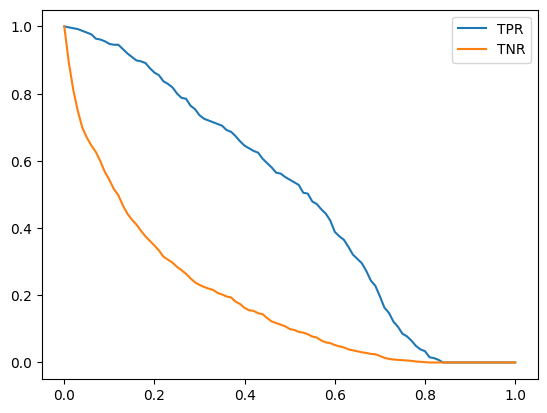

In [113]:
# Curva de ROC evalua estos indicadores para todos los umbrales de decision (0.5) posibles entre 1 y 0
scores = []
thresholds = np.linspace(0,1, 101)
for t in thresholds:
    actual_positive = (y_val == 1)
    actual_negative = (y_val == 0)
    pred_positive = (y_pred >= t)
    pred_negative= (y_pred < t)

    tp = (pred_positive & actual_positive).sum().item() # le agrego .item para que no sea vea el tipo de dato
    tn = (pred_negative & actual_negative).sum().item()
    fp = (pred_positive & actual_negative).sum().item()
    fn = (pred_negative & actual_positive).sum().item()

    scores.append((float(t), tp, tn, fp , fn))

columns = ['thresholds', 'tp', 'tn', 'fp' , 'fn']
df_scores = pd.DataFrame(scores, columns= columns)

#Agregamos una columna con tasa de verd positivos y de falsos positivos
df_scores['tpr'] = df_scores.tp / (df_scores.tp + df_scores.fn)
df_scores['fpr']= df_scores.fp / (df_scores.fp + df_scores.tn)

df_scores[::10]

plt.plot(df_scores.thresholds, df_scores.tpr, label='TPR')
plt.plot(df_scores.thresholds, df_scores.fpr, label='TNR')
plt.legend()

In [114]:
## RANDOM MODEL (despues lo reemplzamos por [0,1])

np.random.seed(1)
y_rand = np.random.uniform(0,1, size=len(y_val))
y_rand.round(3)

((y_rand>=0.5) == y_val).mean()

np.float64(0.5017743080198722)

In [115]:
def tpr_fpr_dataframe(y_val, y_pred):
    scores = []
    thresholds = np.linspace(0,1, 101)
    for t in thresholds:
        actual_positive = (y_val == 1)
        actual_negative = (y_val == 0)
        pred_positive = (y_pred >= t)
        pred_negative= (y_pred < t)

        tp = (pred_positive & actual_positive).sum().item() # le agrego .item para que no sea vea el tipo de dato
        tn = (pred_negative & actual_negative).sum().item()
        fp = (pred_positive & actual_negative).sum().item()
        fn = (pred_negative & actual_positive).sum().item()

        scores.append((float(t), tp, tn, fp , fn))

    columns = ['thresholds', 'tp', 'tn', 'fp' , 'fn']
    df_scores = pd.DataFrame(scores, columns= columns)

    #Agregamos una columna con tasa de verd positivos y de falsos positivos
    df_scores['tpr'] = df_scores.tp / (df_scores.tp + df_scores.fn)
    df_scores['fpr']= df_scores.fp / (df_scores.fp + df_scores.tn)
    return df_scores

In [116]:
df_rand = tpr_fpr_dataframe(y_val,y_rand)
df_rand[::10]

,thresholds,tp,tn,fp,fn,tpr,fpr
0,0.0,386,0,1023,0,1.000000,1.000000
10,0.1,347,100,923,39,0.898964,0.902248
20,0.2,307,201,822,79,0.795337,0.803519
30,0.3,276,299,724,110,0.715026,0.707722
40,0.4,237,399,624,149,0.613990,0.609971
50,0.5,202,505,518,184,0.523316,0.506354
60,0.6,161,614,409,225,0.417098,0.399804
70,0.7,121,721,302,265,0.313472,0.295210
80,0.8,78,817,206,308,0.202073,0.201369
90,0.9,40,922,101,346,0.103627,0.098729


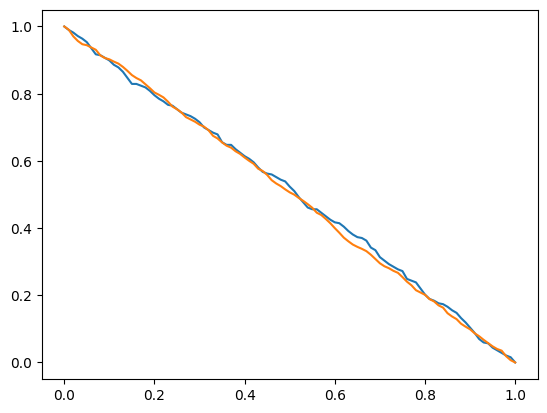

In [117]:
plt.plot(df_rand.thresholds, df_rand.tpr, label='TPR')
plt.plot(df_rand.thresholds, df_rand.fpr, label='TNR')

In [118]:
## IDEAL MODEL (todos 1 y 0)

nro_neg = (y_val == 0).sum()
nro_pos = (y_val == 1).sum()
nro_neg,nro_pos

y_ideal = np.repeat([0,1], [nro_neg,nro_pos])

y_ideal_pred = np.linspace(0,1, len(y_val))

((y_ideal_pred >= 0.726) == y_ideal).mean() # da uno porque es el modelo ideal

df_ideal = tpr_fpr_dataframe(y_ideal,y_ideal_pred)



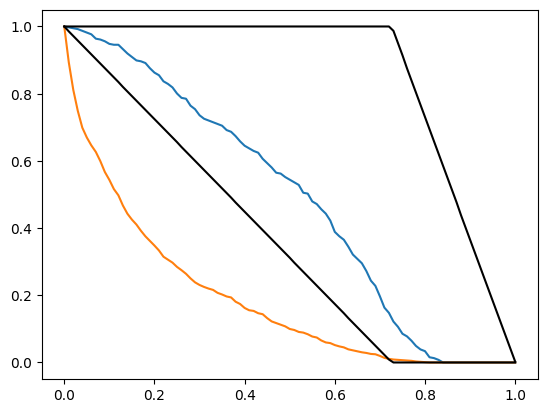

In [119]:
plt.plot(df_scores.thresholds, df_scores.tpr, label='TPR')
plt.plot(df_scores.thresholds, df_scores.fpr, label='TNR')

# plt.plot(df_rand.thresholds, df_rand.tpr, label='TPR')
# plt.plot(df_rand.thresholds, df_rand.fpr, label='TNR')

plt.plot(df_ideal.thresholds, df_ideal.tpr, label='TPR', color='black')
plt.plot(df_ideal.thresholds, df_ideal.fpr, label='TNR', color='black')

Text(0.5, 0, 'FPR')

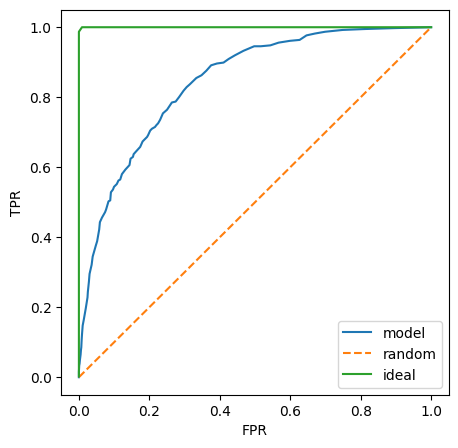

In [120]:
plt.figure(figsize=(5,5))
plt.plot(df_scores.fpr, df_scores.tpr, label= 'model')
plt.plot([0,1], [0,1], label='random', linestyle= '--')
#plt.plot(df_rand.fpr, df_rand.tpr, label='random')
plt.plot(df_ideal.fpr, df_ideal.tpr, label= 'ideal')
plt.legend()
plt.ylabel('TPR')
plt.xlabel('FPR')

In [121]:
# Queremos llegar al punto de donde se minimiza el FP y es maximo TP (0.726 corte) 
# por lo que nuestro modelo sera mejor mientras mas se acerque al punto vertice del modelo ideal y se aleje del aletorio
#Area de ROCA es lo que esta abajo de nuestro modelo y mientras mayor sea mejor

Text(0.5, 0, 'FPR')

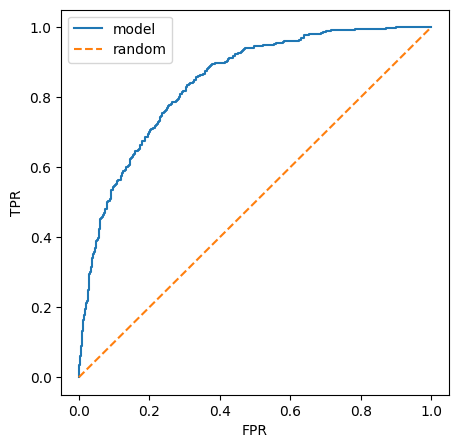

In [122]:
# Hacer esto en scikilearn

from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_val, y_pred)

plt.figure(figsize=(5,5))
plt.plot(fpr, tpr, label= 'model')
plt.plot([0,1], [0,1], label='random', linestyle= '--')
plt.legend()
plt.ylabel('TPR')
plt.xlabel('FPR')

Text(0.5, 0, 'FPR')

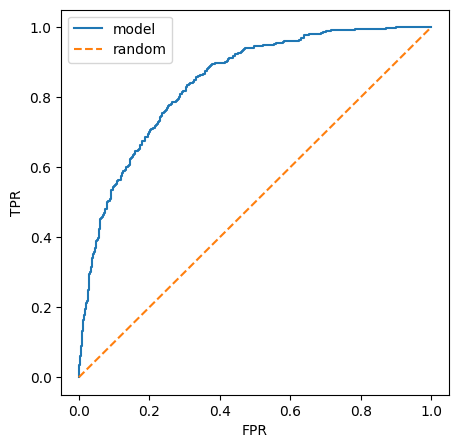

In [123]:
plt.figure(figsize=(5,5))
plt.plot(fpr, tpr, label= 'model')
plt.plot([0,1], [0,1], label='random', linestyle= '--')
plt.legend()
plt.ylabel('TPR')
plt.xlabel('FPR')

In [124]:
# AUC AREA UNDER CURVE (Area bajo la curva)
# Probabilidad que un evento pos seleccionado aleatoriamente tenga un score mas alto que uno neg selecionado aleatoriamente
#Calculamos en base a lo que obtuvimos antes
from sklearn.metrics import auc
auc(fpr, tpr)

# Aca resumimos todo en un solo paso agregando y val y y predicha
from sklearn.metrics import roc_auc_score
roc_auc_score(y_val,y_pred)

0.8438555705812935

In [125]:
#Tasa de exito
neg = y_pred[y_val== 0]
pos = y_pred[y_val== 1]

n=100000
np.random.seed(1)
pos_ind = np.random.randint(0,len(pos), size=n)
neg_ind = np.random.randint(0,len(neg), size=n)

(pos[pos_ind] > neg[neg_ind]).mean()


np.float64(0.84282)

In [126]:
## CROSS VALIDATION (Validacion cruzada)
def train(df_train,y_train,C=1.0):
    train_dict = df_train[categorical + numerical].to_dict(orient='records')
    dv = DictVectorizer(sparse=False)
    X_train = dv.fit_transform(train_dict)

    model = LogisticRegression(C=C, max_iter=10000)
    model.fit(X_train, y_train)
    return dv, model

dv, model = train(df_train, y_train, C=0.001)

def prediccion(df_val,dv,model):
    val_dict = df_val[categorical + numerical].to_dict(orient='records')
    X_val = dv.transform(val_dict)
    y_pred = model.predict_proba(X_val)[:, 1]
    return y_pred

y_pred = prediccion(df_val, dv, model)

In [127]:
!pip install tqdm

from tqdm.auto import tqdm # Se usa para ver como van corriendo las iteraciones


[notice] A new release of pip is available: 24.3.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [128]:
# Al df de train + val se lo divide en 10 y vamos rotando 10 vces a los 10 en la parte de val
# Obtenemos los indices y lo divimos
from sklearn.model_selection import KFold

Kfold = KFold(n_splits=10, shuffle=True, random_state=1)

n_splits = 5 

for C in tqdm([0.001, 0.01, 0.1, 0.5, 1, 5, 10]):
    Kfold = KFold(n_splits=n_splits, shuffle=True, random_state=1)


    scores = []

    for(train_idx, val_idx) in Kfold.split(df_full_train):
        df_val = df_full_train.iloc[val_idx]

        y_train = df_train.churn.values
        y_val = df_val.churn.values

        dv, model = train(df_train,y_train,C=C)
        y_pred = prediccion(df_val,dv,model)

        auc = roc_auc_score(y_val,y_pred)
        scores.append(auc)

    print('C=%s %.3f +- %.3f' % (C, np.mean(scores), np.std(scores)))


  0%|          | 0/7 [00:00<?, ?it/s]


AttributeError: 'DataFrame' object has no attribute 'churn'

In [ ]:
dv, model = train(df_full_train,df_full_train.churn.values,C=1)
y_pred = prediccion(df_test,dv,model)

auc = roc_auc_score(y_test, y_pred)
auc

0.8584086255646918